## **Question 1: Contextual word embedding and TF-IDF**

### (a) What is the benefit of using a counting based vector representation like TF-IDF over a learning based representation like Word2Vec?

Ans : 

- Training Word2Vec is more memory intensive comparing to Computing TF IDF is less memory intensive.   
- TF-IDF will work better while the data is less and/or not balanced with compared to Word2Vec

### (b) What are the advantages of character-based representation like fasttext over word-based representation like Word2Vec?


Ans:

Word2Vec treats each word in corpus like an entity and generates a vector for each word. where Fasttext treats each word as character n grams. For example, 

Word - Laptop , min n gram - 3, max n gram - 7

vectors of the n-grams : "<la", "lap", "lapt", "lapto","laptop",......,"op>"

Advantages : 
- Fasttext generates better word embeddigns for rare words while in word2vec rare words have few neighbours. 
- Out of Vocabulory words - Fasttext can construct the vector for unseen word from its character n grams where Word2vec can not handle unseen words. 


Ref: https://www.quora.com/What-is-the-main-difference-between-word2vec-and-fastText

### (c) In sample-code/l13-llm-quiz folder in course github, you will find a file called “projs.txt” containing the list of projects in the course. Do the following:

Ref:

- https://github.com/biplav-s/course-nl-f22/blob/main/sample-code/l13-llm-quiz/Glove%20usage.ipynb
- https://github.com/biplav-s/course-nl-f22/blob/main/sample-code/l5-wordrepresent/Word%20Representations%20-%20Vectors.ipynb
- http://amparser.coli.uni-saarland.de:8080/
- https://github.com/biplav-s/course-nl-f22/blob/main/sample-code/l10-ml-review/Clustering%20-%20Data%20Insights.ipynb
- https://github.com/bjascob/amrlib
- https://github.com/biplav-s/course-nl-f22/blob/main/sample-code/l9-semantics/PENMAN%20Notation%20-%20AMR.ipynb


#### (i) Consider each line as a document and represent words in TF-IDF

In [ ]:
documents = []
with open('projs.txt') as f:
    [documents.append(line.replace('\n','')) for line in f.readlines()]
documents

['Water - South Carolina',
 'Evolving Firearm Regulations',
 'Crime analysis in South Carolina',
 'Target aspect based sentiment analysis for urban neighborhoods',
 'Extracting synthesis procedure from solar cell perovskite based scientific publications.',
 'Entity Recognition : Water Data Regulations',
 "TOS: Banks' Terms of Services summary",
 'Water Regulation Summarization',
 'Predicting the 2022 gubernatorial election of South Carolina using sentiment analysis of Twitter.',
 'Scientific Artical Summarization',
 'New FastText [with Election data]',
 'Chatbot to answer quesries regarding WHO Water Regulations ',
 'Verifying various foods connection to improve diabetes using NLP techniques ',
 'Summarization of Terms and conditions',
 'Chatbot for Elections FAQ - State of Mississippi',
 'Image Captioning using Transformer Models',
 'Specialist Doctor Recommendation System',
 'Application of Artificial Neural Networks (ANN) to Automatic Speech Recognition (ASR) on a Novel Dataset crea

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(documents)
print(vectorizer.get_feature_names())
print(X.toarray())

['10', '2022', 'analysis', 'and', 'ann', 'answer', 'answering', 'application', 'arizona', 'artical', 'artificial', 'aspect', 'asr', 'automatic', 'banks', 'based', 'captioning', 'carolina', 'cell', 'chatbot', 'conditions', 'connection', 'created', 'crime', 'crisis', 'damaged', 'data', 'dataset', 'detecting', 'diabetes', 'doc', 'doctor', 'election', 'elections', 'entity', 'events', 'evolving', 'extracting', 'faq', 'fasttext', 'firearm', 'foods', 'for', 'from', 'gubernatorial', 'image', 'improve', 'in', 'mississippi', 'models', 'neighborhoods', 'networks', 'neural', 'new', 'nlp', 'novel', 'of', 'on', 'one', 'ones', 'ongoing', 'perovskite', 'predicting', 'prediction', 'procedure', 'publications', 'quesries', 'question', 'rating', 'recognition', 'recommendation', 'regarding', 'regulation', 'regulations', 'scientific', 'sentiment', 'services', 'severity', 'short', 'solar', 'south', 'specialist', 'speech', 'state', 'summarization', 'summary', 'synthesis', 'system', 'target', 'techniques', 'te

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


#### (ii) Identify your project name and identify all projects similar to yours. Use a cosine similarity of 0.9

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity

In [ ]:
res = X.toarray()
for i in range(len(res)):
    print ("Distance with doc - ", 5 , " is - ", cosine_similarity(res[5].reshape(1, -1), res[i].reshape(1, -1)))

Distance with doc -  5  is -  [[0.18633231]]
Distance with doc -  5  is -  [[0.17916227]]
Distance with doc -  5  is -  [[0.]]
Distance with doc -  5  is -  [[0.]]
Distance with doc -  5  is -  [[0.]]
Distance with doc -  5  is -  [[1.]]
Distance with doc -  5  is -  [[0.]]
Distance with doc -  5  is -  [[0.16951642]]
Distance with doc -  5  is -  [[0.]]
Distance with doc -  5  is -  [[0.]]
Distance with doc -  5  is -  [[0.19327852]]
Distance with doc -  5  is -  [[0.2096724]]
Distance with doc -  5  is -  [[0.]]
Distance with doc -  5  is -  [[0.]]
Distance with doc -  5  is -  [[0.]]
Distance with doc -  5  is -  [[0.]]
Distance with doc -  5  is -  [[0.]]
Distance with doc -  5  is -  [[0.10527363]]
Distance with doc -  5  is -  [[0.]]
Distance with doc -  5  is -  [[0.37541324]]
Distance with doc -  5  is -  [[0.]]
Distance with doc -  5  is -  [[0.]]


Here none of the project has 0.9 or higher cosine similarity. 

In [ ]:
import pandas as pd
from matplotlib import pyplot as plt

df_cosine=pd.DataFrame(cosine_similarity(res,dense_output=True))

In [ ]:
df_cosine

,0,1,2,3,4,5,6,7,8,9,...,12,13,14,15,16,17,18,19,20,21
0,1.000000,0.000000,0.503429,0.000000,0.000000,0.186332,0.000000,0.242481,0.296724,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.248424,0.0,0.0
1,0.000000,1.000000,0.000000,0.000000,0.000000,0.179162,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.238864,0.0,0.0
2,0.503429,0.000000,1.000000,0.125714,0.000000,0.000000,0.000000,0.000000,0.305494,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.108409,0.000000,0.0,0.0
3,0.000000,0.000000,0.125714,1.000000,0.095344,0.000000,0.000000,0.000000,0.164512,0.000000,...,0.000000,0.000000,0.120720,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0
4,0.000000,0.000000,0.000000,0.095344,1.000000,0.000000,0.000000,0.000000,0.000000,0.161970,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0
5,0.186332,0.179162,0.000000,0.000000,0.000000,1.000000,0.000000,0.169516,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.105274,0.000000,0.375413,0.0,0.0
6,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.109032,0.000000,...,0.000000,0.273884,0.072788,0.000000,0.0,0.045346,0.047563,0.000000,0.0,0.0
7,0.242481,0.000000,0.000000,0.000000,0.000000,0.169516,0.000000,1.000000,0.000000,0.283068,...,0.000000,0.231931,0.000000,0.000000,0.0,0.000000,0.000000,0.226004,0.0,0.0
8,0.296724,0.000000,0.305494,0.164512,0.000000,0.000000,0.109032,0.000000,1.000000,0.000000,...,0.054530,0.130842,0.101666,0.077538,0.0,0.105486,0.066432,0.000000,0.0,0.0
9,0.000000,0.000000,0.000000,0.000000,0.161970,0.000000,0.000000,0.283068,0.000000,1.000000,...,0.000000,0.216298,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0


#### (iii) Identify clusters of projects along the same theme, based on similarity of project names.

In [ ]:
from sklearn.cluster import KMeans

def run_kmeans(k, data_tfidf, vectorizer):
    model = KMeans(n_clusters=k, init='k-means++', max_iter=100, n_init=10)
    model.fit(data_tfidf)
    order_centroids = model.cluster_centers_.argsort()[:, ::-1]
    for i in range(k):
        print("Cluster %d:" % i),
        for word in order_centroids[i, :5]:
            print("\t%s" % documents[word])

In [ ]:
k = 5
run_kmeans(k, df_cosine, vectorizer)

Cluster 0:
	Verifying various foods connection to improve diabetes using NLP techniques 
	Application of Artificial Neural Networks (ANN) to Automatic Speech Recognition (ASR) on a Novel Dataset created using YouTube
	Image Captioning using Transformer Models
	Visual Question Answering
	Specialist Doctor Recommendation System
Cluster 1:
	Crime analysis in South Carolina
	Water - South Carolina
	Predicting the 2022 gubernatorial election of South Carolina using sentiment analysis of Twitter.
	Target aspect based sentiment analysis for urban neighborhoods
	Water Regulations - Arizona
Cluster 2:
	Summarization of Terms and conditions
	TOS: Banks' Terms of Services summary
	Scientific Artical Summarization
	Detecting and rating severity of urgency in short, one-time crisis events vs. ongoing ones
	Water Regulation Summarization
Cluster 3:
	Water Regulations - Arizona
	Entity Recognition : Water Data Regulations
	Chatbot to answer quesries regarding WHO Water Regulations 
	Evolving Firearm 

## **Question 2: Semantics**

### (a) Using the online AMR tool at http://amparser.coli.uni-saarland.de:8080/, find the AMR structure of the example text. Paste it below.

785.svg






785 (1).svg

### (b) The AMR refers to specific variant of show, fly and have. Use pennbank and show the predicate, its arguments and its meaning. Use a propbank visualizer like https://verbs.colorado.edu/verb-index/index.php.

In [ ]:
#!tar xzf model_parse_gsii-v0_1_0.tar.gz -C /usr/local/lib/python3.7/dist-packages/amrlib/data/
#!ln -snf /usr/local/lib/python3.7/dist-packages/amrlib/data/model_parse_gsii-v0_1_0    /usr/local/lib/python3.7/dist-packages/amrlib/data/model_stog

import amrlib
stog = amrlib.load_stog_model()
graphs = stog.parse_sents(['show me flights from Boston to anywhere that has flights to Dallas'])
for graph in graphs:
    print(graph)

Loading model /usr/local/lib/python3.7/dist-packages/amrlib/data/model_stog/model.pt


Downloading:   0%|          | 0.00/213k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/29.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/570 [00:00<?, ?B/s]

The tokenizer class you load from this checkpoint is not the same type as the class this function is called from. It may result in unexpected tokenization. 
The tokenizer class you load from this checkpoint is 'BertTokenizer'. 
The class this function is called from is 'BertEncoderTokenizer'.


Downloading:   0%|          | 0.00/436M [00:00<?, ?B/s]

Some weights of the model checkpoint at bert-base-cased were not used when initializing BertEncoder: ['cls.seq_relationship.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.decoder.weight', 'cls.predictions.transform.dense.bias', 'cls.seq_relationship.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.bias', 'cls.predictions.transform.LayerNorm.bias']
- This IS expected if you are initializing BertEncoder from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertEncoder from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


# ::snt show me flights from Boston to anywhere that has flights to Dallas
# ::tokens ["show", "me", "flights", "from", "Boston", "to", "anywhere", "that", "has", "flights", "to", "Dallas"]
# ::ner_tags ["O", "O", "O", "O", "GPE", "O", "O", "O", "O", "O", "O", "GPE"]
# ::ner_iob ["O", "O", "O", "O", "B", "O", "O", "O", "O", "O", "O", "B"]
# ::pos_tags ["VB", "PRP", "NNS", "IN", "NNP", "IN", "RB", "DT", "VBZ", "NNS", "IN", "NNP"]
# ::lemmas ["show", "i", "flight", "from", "Boston", "to", "anywhere", "that", "have", "flight", "to", "Dallas"]
(s0 / show-01
      :mode imperative 
      :ARG2 (i0 / i)
      :ARG0 (y0 / you)
      :ARG1 (f0 / fly-01
            :destination (a0 / anywhere)
            :source (c0 / city
                  :name (n0 / name
                        :op1 "Boston" )
                  :ARG1-of (f1 / fly-01
                        :destination (c1 / city
                              :name (n1 / name
                                    :op1 "Dallas" ))))))


In [ ]:
!sudo mkdir /usr/local/lib/python3.7/dist-packages/amrlib/data

In [ ]:
import penman
penman.__version__

'1.2.2'

In [ ]:
g = penman.decode('''
 # ::snt show me flights from Boston to anywhere that has flights to Dallas
    (s0 / show-01
      :mode imperative 
      :ARG2 (i0 / i)
      :ARG0 (y0 / you)
      :ARG1 (f0 / fly-01
            :destination (a0 / anywhere)
            :source (c0 / city
                  :name (n0 / name
                        :op1 "Boston" )
                  :ARG1-of (f1 / fly-01
                        :destination (c1 / city
                              :name (n1 / name
                                    :op1 "Dallas" ))))))
              ''')

In [ ]:
print(penman.encode(g))

# ::snt show me flights from Boston to anywhere that has flights to Dallas
(s0 / show-01
    :mode imperative
    :ARG2 (i0 / i)
    :ARG0 (y0 / you)
    :ARG1 (f0 / fly-01
              :destination (a0 / anywhere)
              :source (c0 / city
                          :name (n0 / name
                                    :op1 "Boston")
                          :ARG1-of (f1 / fly-01
                                       :destination (c1 / city
                                                        :name (n1 / name
                                                                  :op1 "Dallas"))))))


In [ ]:
# Introspection
g.instances()

[Instance(source='s0', role=':instance', target='show-01'),
 Instance(source='i0', role=':instance', target='i'),
 Instance(source='y0', role=':instance', target='you'),
 Instance(source='f0', role=':instance', target='fly-01'),
 Instance(source='a0', role=':instance', target='anywhere'),
 Instance(source='c0', role=':instance', target='city'),
 Instance(source='n0', role=':instance', target='name'),
 Instance(source='f1', role=':instance', target='fly-01'),
 Instance(source='c1', role=':instance', target='city'),
 Instance(source='n1', role=':instance', target='name')]

In [ ]:
# Printing triples
g.triples

[('s0', ':instance', 'show-01'),
 ('s0', ':mode', 'imperative'),
 ('s0', ':ARG2', 'i0'),
 ('i0', ':instance', 'i'),
 ('s0', ':ARG0', 'y0'),
 ('y0', ':instance', 'you'),
 ('s0', ':ARG1', 'f0'),
 ('f0', ':instance', 'fly-01'),
 ('f0', ':destination', 'a0'),
 ('a0', ':instance', 'anywhere'),
 ('f0', ':source', 'c0'),
 ('c0', ':instance', 'city'),
 ('c0', ':name', 'n0'),
 ('n0', ':instance', 'name'),
 ('n0', ':op1', '"Boston"'),
 ('f1', ':ARG1', 'c0'),
 ('f1', ':instance', 'fly-01'),
 ('f1', ':destination', 'c1'),
 ('c1', ':instance', 'city'),
 ('c1', ':name', 'n1'),
 ('n1', ':instance', 'name'),
 ('n1', ':op1', '"Dallas"')]

## **Question 3: Word2Vec**

Ref:

- https://github.com/biplav-s/course-nl/blob/master/l7-language/code/Word%20embedding%20with%20Gensim.ipynb
- https://towardsdatascience.com/visualization-of-word-embedding-vectors-using-gensim-and-pca-8f592a5d3354


### (a) Take your latest resume (must be more than 1 page). Create a word2vec representation for it using genism and print statistics of embeddings.

In [ ]:
from gensim.models import Word2Vec
import nltk
from nltk.tokenize import sent_tokenize
nltk.download('punkt')

lines = []
with open('Raxit Goswami - CV.txt') as f:
    for line in f.readlines():
      line = line.replace('\n','')
      if line!='':
        lines.append(line)  
lines


#Convert data into sentences
sentences = []
for line in lines:
  [sentences.append(sentence) for sentence in sent_tokenize(line)]
sentences

wordtokens = []
for sentence in sentences:
  wordtokens.append(nltk.word_tokenize(sentence))
wordtokens

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


[['Raxit', 'Goswami'],
 ['Email',
  'Id',
  ':',
  'goswamiraxit',
  '@',
  'gmail.com',
  'M',
  ':',
  '+91',
  '9898575075'],
 ['________________'],
 ['Career',
  'Objective',
  ':',
  'Experienced',
  'data',
  'science',
  'professional',
  'with',
  'excellent',
  'leadership',
  'and',
  'interpersonal',
  'skills',
  '.'],
 ['Seeking',
  'to',
  'learn',
  'new',
  'methodologies',
  'around',
  'Deep',
  'learning',
  'and',
  'build',
  'most',
  'accurate',
  'Deep',
  'Learning',
  'models',
  'in',
  'clinical',
  'domain',
  'which',
  'result',
  'into',
  'saving',
  'human',
  'lives'],
 ['Education', ':'],
 ['Bachelor',
  "'s",
  'degree',
  'in',
  'Technology',
  '(',
  'B.Tech',
  ')',
  ',',
  'Computer',
  'Engineering',
  ',',
  '71.25',
  '%',
  'June',
  '2007',
  'to',
  'June',
  '2011'],
 ['U.',
  'V',
  'Patel',
  'College',
  'of',
  'Engineering',
  ',',
  'Ganpat',
  'University'],
 ['Professional', 'Experience', ':'],
 ['Research',
  'Engineer',
  ',',

In [ ]:
from gensim.models import Word2Vec
# train model
model = Word2Vec(wordtokens, min_count=1)
# summarize the loaded model
print("INFO: Model - \n" + str(model))

INFO: Model - 
Word2Vec(vocab=277, size=100, alpha=0.025)


In [ ]:
# summarize vocabulary
words = list(model.wv.vocab)
print("INFO: Words found - \n" + str(words))


INFO: Words found - 
['Raxit', 'Goswami', 'Email', 'Id', ':', 'goswamiraxit', '@', 'gmail.com', 'M', '+91', '9898575075', '________________', 'Career', 'Objective', 'Experienced', 'data', 'science', 'professional', 'with', 'excellent', 'leadership', 'and', 'interpersonal', 'skills', '.', 'Seeking', 'to', 'learn', 'new', 'methodologies', 'around', 'Deep', 'learning', 'build', 'most', 'accurate', 'Learning', 'models', 'in', 'clinical', 'domain', 'which', 'result', 'into', 'saving', 'human', 'lives', 'Education', 'Bachelor', "'s", 'degree', 'Technology', '(', 'B.Tech', ')', ',', 'Computer', 'Engineering', '71.25', '%', 'June', '2007', '2011', 'U.', 'V', 'Patel', 'College', 'of', 'Ganpat', 'University', 'Professional', 'Experience', 'Research', 'Engineer', 'ezDI', 'Solution', 'India', 'LLP', 'Ahmedabad', 'May', '2013', '*', 'Worked', 'Java', 'semantic', 'web', 'technologies', 'deep', 'knowledge', 'graph', 'Designed', 'OWL', 'schema', 'for', 'search', 'engine', 'find', 'contextual', 'inform

In [ ]:
# access vector for one word - specified by myword
myword = 'learning'
print("INFO: Model of '" + myword + "' - \n" + str(model[myword]))

INFO: Model of 'learning' - 
[ 4.6559732e-04  1.6168811e-03 -2.6933246e-03 -3.6495684e-03
  4.5865481e-03 -4.5061158e-03 -4.1544014e-03 -4.3584085e-03
 -3.3615530e-03 -1.2856264e-03  4.7805621e-03 -4.2316406e-03
 -4.6204594e-03 -4.4793412e-03  1.9549383e-03  1.7192973e-03
 -7.5974100e-04  2.6592435e-03  2.2087654e-03  1.3719762e-03
  2.9693523e-03 -6.4478430e-04  4.0830686e-03 -1.2338116e-03
 -3.0714935e-03  2.1013934e-03  1.0246149e-03 -5.4126309e-04
  2.1192555e-03  3.3738073e-03  1.4541760e-03 -4.1217739e-03
 -4.9442882e-03  4.0125721e-03  4.7698417e-03 -2.0292383e-03
 -4.3196571e-03 -4.7122827e-03  4.5655668e-03 -2.3367591e-03
 -1.7983280e-03  3.8358544e-03  2.8532739e-03  3.2034349e-03
 -3.1334709e-03 -1.7951269e-03  4.1619507e-03  3.7343537e-03
 -1.0988098e-03  3.7407910e-03  3.8389193e-03  1.9893504e-03
  4.9176253e-03 -2.3232165e-03 -3.3508721e-03 -1.0686287e-03
 -2.0625538e-03 -4.9451538e-03  3.7794814e-03 -8.4089981e-05
  2.4464023e-03 -3.9987052e-03  4.9222265e-03  2.4416528

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
import pandas as pd

X=model[model.wv.vocab]
df=pd.DataFrame(X)
df.shape
df.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  This is separate from the ipykernel package so we can avoid doing imports until


,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,0.003965,0.001796,0.002743,0.003832,0.000200,0.000769,-0.002367,-0.001684,0.001237,0.002278,...,0.001706,-0.000262,-0.003366,-0.004471,-0.004242,0.004877,0.000795,0.003124,-0.000711,-0.002688
1,0.001616,0.000832,-0.003039,-0.000577,-0.004879,-0.001884,0.004638,-0.004013,0.002526,-0.000305,...,0.004315,0.002136,0.004947,0.003299,0.002738,0.002324,0.004356,0.001245,-0.001765,-0.002774
2,-0.000362,-0.000778,0.004830,0.003594,0.003450,0.003125,0.004445,0.000152,0.004736,-0.003485,...,-0.003919,0.003629,-0.001895,-0.004494,0.001751,0.001785,0.003303,-0.004162,0.002280,0.004859
3,0.003544,-0.001440,0.002487,0.000825,-0.001066,0.002946,0.003094,-0.000706,-0.004710,0.000769,...,0.003476,-0.004897,-0.001323,0.003125,0.003916,-0.001591,0.001664,0.002042,0.002476,-0.001555
4,0.002374,-0.003379,-0.001466,-0.000304,0.004281,0.004277,0.001576,-0.000400,-0.002582,-0.003228,...,0.003264,0.001955,-0.002307,-0.001255,0.000305,0.001192,-0.000055,-0.001840,-0.004164,0.003400


In [ ]:
df.shape

(277, 100)

### (b) Visualize the embedding using PCA

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(df)
#principalDf = pd.DataFrame(data = principalComponents)

In [ ]:
principalComponents

array([[-4.32779547e-03, -3.66306608e-03],
       [ 3.29558318e-03, -1.22331909e-03],
       [ 6.05656160e-03,  1.49764691e-03],
       [-3.62714607e-04, -3.21847247e-03],
       [ 2.67136982e-03,  2.19277732e-04],
       [ 3.97656206e-03,  2.06331280e-03],
       [ 3.17813428e-05,  9.49809793e-03],
       [-3.67552484e-03,  2.85360124e-03],
       [ 3.04835313e-03,  3.71075817e-03],
       [ 3.71839182e-04,  6.61015930e-03],
       [-4.13906237e-04, -5.59979351e-03],
       [-3.83980543e-04, -3.11462767e-03],
       [ 3.19373357e-04,  1.22565078e-03],
       [-4.26080544e-03,  3.00470786e-03],
       [-3.78646189e-03,  4.11369139e-03],
       [ 5.70001733e-03,  8.20714340e-04],
       [-2.30042776e-03,  6.78523583e-03],
       [ 8.59188661e-03,  3.03801405e-03],
       [ 9.09806113e-04, -5.56892063e-03],
       [ 1.87265780e-03, -7.01114652e-04],
       [ 7.07883300e-05, -3.15706618e-03],
       [-5.99660212e-03, -1.03948340e-02],
       [ 3.04801017e-03,  2.69606384e-03],
       [-3.

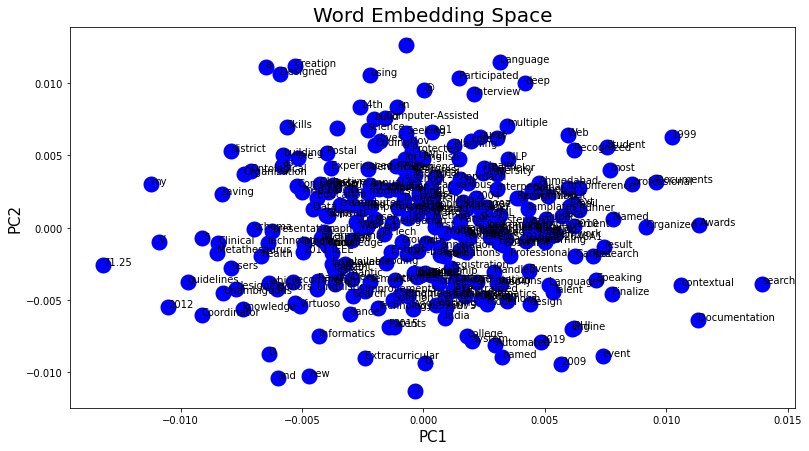

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(13,7))
plt.scatter(principalComponents[:,0],principalComponents[:,1],linewidths=10,color='blue')
plt.xlabel("PC1",size=15)
plt.ylabel("PC2",size=15)
plt.title("Word Embedding Space",size=20)
for i, word in enumerate(words):
  plt.annotate(word,xy=(principalComponents[i,0],principalComponents[i,1]))

### (c) Now create and visualize the embedding of the projects listed in the file - sample-code/l13-llm-quiz/projs.txt.

In [ ]:
wordtokens = []
for sentence in documents:
  wordtokens.append(nltk.word_tokenize(sentence))
wordtokens

[['Water', '-', 'South', 'Carolina'],
 ['Evolving', 'Firearm', 'Regulations'],
 ['Crime', 'analysis', 'in', 'South', 'Carolina'],
 ['Target',
  'aspect',
  'based',
  'sentiment',
  'analysis',
  'for',
  'urban',
  'neighborhoods'],
 ['Extracting',
  'synthesis',
  'procedure',
  'from',
  'solar',
  'cell',
  'perovskite',
  'based',
  'scientific',
  'publications',
  '.'],
 ['Entity', 'Recognition', ':', 'Water', 'Data', 'Regulations'],
 ['TOS', ':', 'Banks', "'", 'Terms', 'of', 'Services', 'summary'],
 ['Water', 'Regulation', 'Summarization'],
 ['Predicting',
  'the',
  '2022',
  'gubernatorial',
  'election',
  'of',
  'South',
  'Carolina',
  'using',
  'sentiment',
  'analysis',
  'of',
  'Twitter',
  '.'],
 ['Scientific', 'Artical', 'Summarization'],
 ['New', 'FastText', '[', 'with', 'Election', 'data', ']'],
 ['Chatbot',
  'to',
  'answer',
  'quesries',
  'regarding',
  'WHO',
  'Water',
  'Regulations'],
 ['Verifying',
  'various',
  'foods',
  'connection',
  'to',
  'impr

In [ ]:
from gensim.models import Word2Vec
# train model
model = Word2Vec(wordtokens, min_count=1)
# summarize the loaded model
print("INFO: Model - \n" + str(model))

INFO: Model - 
Word2Vec(vocab=121, size=100, alpha=0.025)


In [ ]:
# summarize vocabulary
words = list(model.wv.vocab)
print("INFO: Words found - \n" + str(words))

INFO: Words found - 
['Water', '-', 'South', 'Carolina', 'Evolving', 'Firearm', 'Regulations', 'Crime', 'analysis', 'in', 'Target', 'aspect', 'based', 'sentiment', 'for', 'urban', 'neighborhoods', 'Extracting', 'synthesis', 'procedure', 'from', 'solar', 'cell', 'perovskite', 'scientific', 'publications', '.', 'Entity', 'Recognition', ':', 'Data', 'TOS', 'Banks', "'", 'Terms', 'of', 'Services', 'summary', 'Regulation', 'Summarization', 'Predicting', 'the', '2022', 'gubernatorial', 'election', 'using', 'Twitter', 'Scientific', 'Artical', 'New', 'FastText', '[', 'with', 'Election', 'data', ']', 'Chatbot', 'to', 'answer', 'quesries', 'regarding', 'WHO', 'Verifying', 'various', 'foods', 'connection', 'improve', 'diabetes', 'NLP', 'techniques', 'and', 'conditions', 'Elections', 'FAQ', 'State', 'Mississippi', 'Image', 'Captioning', 'Transformer', 'Models', 'Specialist', 'Doctor', 'Recommendation', 'System', 'Application', 'Artificial', 'Neural', 'Networks', '(', 'ANN', ')', 'Automatic', 'Spee

In [ ]:
import pandas as pd

X=model[model.wv.vocab]
df=pd.DataFrame(X)
df.shape
df.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  This is separate from the ipykernel package so we can avoid doing imports until


,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,0.001774,-0.000837,-0.002822,-0.004129,0.001189,0.000440,0.003032,0.000651,-0.002829,-0.004344,...,0.001691,-0.002637,-0.004890,0.004877,-0.003661,-0.001041,0.003761,0.003008,0.002619,0.000219
1,-0.002857,-0.002852,0.001693,0.003955,0.004129,-0.001238,0.002249,0.001931,0.001308,0.000330,...,0.000945,-0.000394,0.003025,0.002004,0.002103,-0.000303,0.002054,0.002814,-0.002192,0.003591
2,-0.004259,0.004158,0.003445,0.004528,0.004408,-0.002436,0.003181,0.004744,-0.000878,0.001899,...,0.000537,-0.000581,0.002232,-0.001661,-0.004721,0.004285,-0.000195,0.002154,0.001201,-0.003703
3,0.002080,0.002949,0.003052,-0.000776,0.001091,-0.001721,0.001189,0.004098,0.003416,-0.001269,...,-0.004403,0.000223,-0.003622,-0.004061,-0.004390,0.002492,-0.004865,-0.001297,0.000809,0.000994
4,-0.004898,0.004117,-0.001571,0.002476,-0.004459,0.003835,0.002950,0.000053,-0.001801,-0.001664,...,-0.003078,0.003483,-0.003464,-0.003471,-0.000296,-0.000954,0.001045,0.004504,-0.003956,0.002619


In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(df)
#principalDf = pd.DataFrame(data = principalComponents)

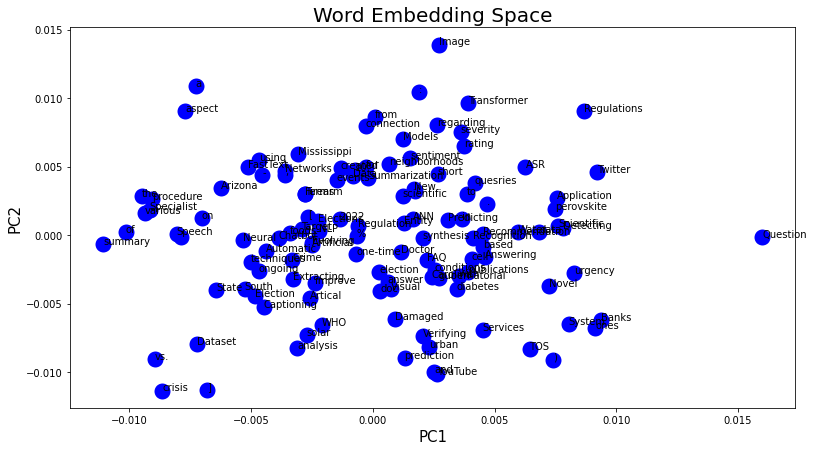

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(13,7))
plt.scatter(principalComponents[:,0],principalComponents[:,1],linewidths=10,color='blue')
plt.xlabel("PC1",size=15)
plt.ylabel("PC2",size=15)
plt.title("Word Embedding Space",size=20)
for i, word in enumerate(words):
  plt.annotate(word,xy=(principalComponents[i,0],principalComponents[i,1]))